In [90]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
data = pd.read_csv('train.csv')

In [64]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [65]:
from sklearn.impute import KNNImputer

In [66]:
imp = KNNImputer(n_neighbors=2)

In [67]:
data.drop('PassengerId',axis=1,inplace=True)

In [68]:
data.drop('Name',axis=1,inplace=True)

In [69]:
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [70]:
data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [71]:
temp = {'Earth':1, 'Europa':2, 'Mars':3}

data['HomePlanet'] = data['HomePlanet'].map(temp)

In [72]:
data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [73]:
data['Cde'] = pd.DataFrame(data['Cabin'].str.split('/',expand=True))[2]

In [74]:
temp = {'S':1,'P':2}

data['Cde'] = data['Cde'].map(temp)

In [75]:
data.drop('Cabin',axis=1,inplace=True)

In [76]:
data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [77]:
temp = {'TRAPPIST-1e':1, '55 Cancri e':2, 'PSO J318.5-22':3}

data['Destination'] = data['Destination'].map(temp)


In [78]:
data

c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cde
0,2.0,False,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2.0
1,1.0,False,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0
2,2.0,False,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1.0
3,2.0,False,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1.0
4,1.0,False,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2.0,False,2.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,2.0
8689,1.0,True,3.0,18.0,False,0.0,0.0,0.0,0.0,0.0,False,1.0
8690,1.0,False,1.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1.0
8691,2.0,False,2.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1.0


In [81]:
data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cde'],
      dtype='object')

In [82]:
data_n = pd.DataFrame(imp.fit_transform(data),columns=['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cde'])

In [83]:
data_n

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cde
0,2.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0
2,2.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0
3,2.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,1.0
4,1.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2.0,0.0,2.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0,2.0
8689,1.0,1.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8690,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,1.0
8691,2.0,0.0,2.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0.0,1.0


<AxesSubplot: >

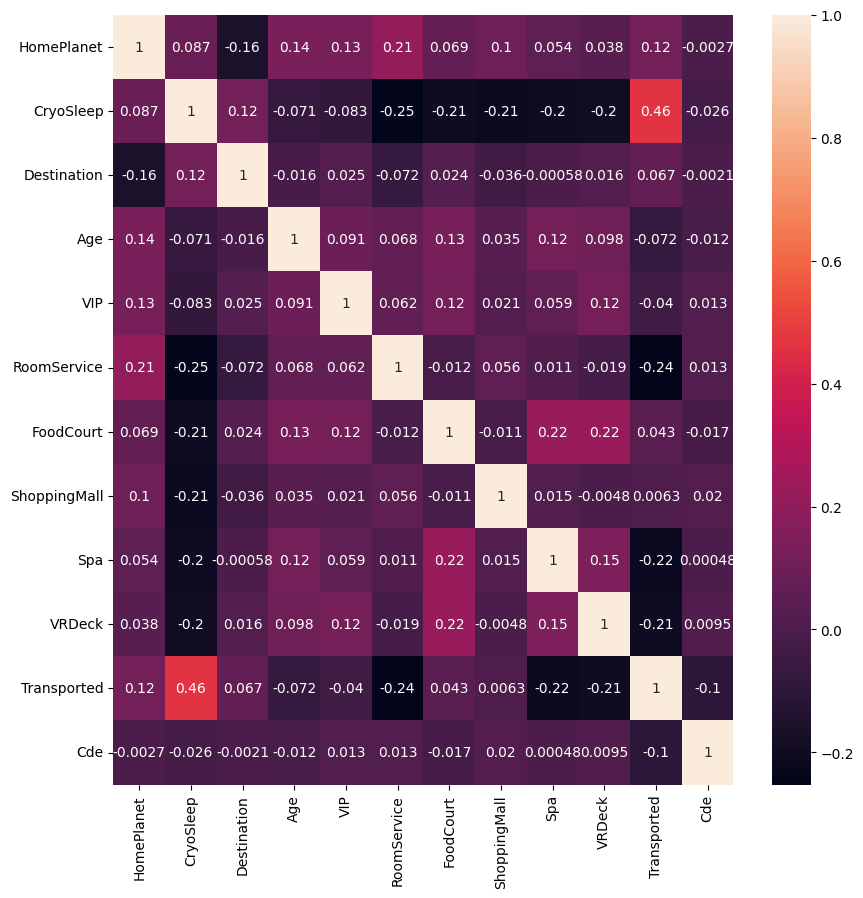

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(data_n.corr(),annot=True)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression()

In [87]:
from sklearn.model_selection import train_test_split

In [91]:
np.random.seed(42)

X_train,X_test,Y_train,Y_test = train_test_split(data_n.drop('Transported',axis=1),data_n['Transported'],test_size = 0.3)

In [92]:
model.fit(X_train,Y_train)

c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
model.score(X_test,Y_test)

0.7737730061349694